<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [49]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [50]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()

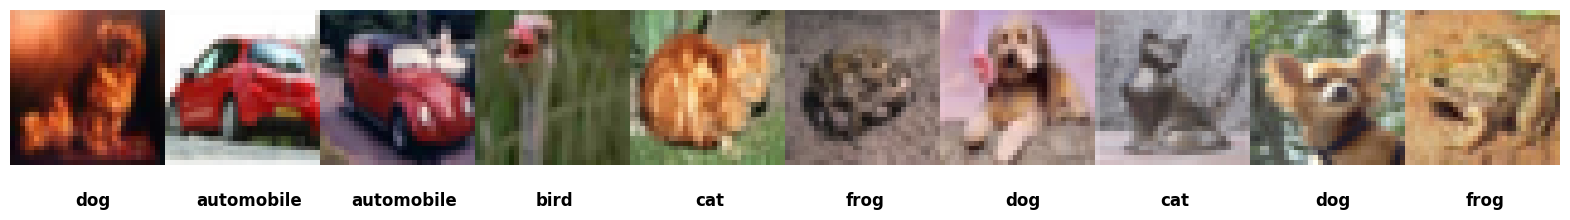

In [51]:
display_random_images(X_train, y_train)

In [52]:
X_train.shape

(50000, 32, 32, 3)

In [53]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 640x480 with 0 Axes>

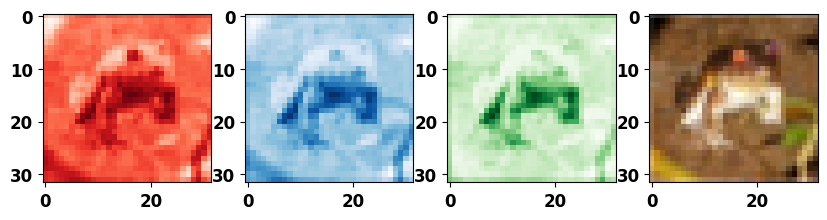

In [54]:
display_channels_separately(X_train[0])


In [55]:
X_train_scaled = X_train.astype('float32') / 255.0

In [56]:
y_train_encoded = to_categorical(y_train, num_classes=10)

In [57]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [58]:
from keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout


In [59]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [62]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=75, batch_size=128, validation_split = 0.2)

Epoch 1/75
313/313 [==============================] - 2s 6ms/step - loss: 2.0123 - accuracy: 0.2763 - val_loss: 1.9139 - val_accuracy: 0.3185
Epoch 2/75
313/313 [==============================] - 1s 4ms/step - loss: 1.8603 - accuracy: 0.3428 - val_loss: 1.8741 - val_accuracy: 0.3443
Epoch 3/75
313/313 [==============================] - 2s 6ms/step - loss: 1.8100 - accuracy: 0.3625 - val_loss: 1.8421 - val_accuracy: 0.3472
Epoch 4/75
313/313 [==============================] - 2s 8ms/step - loss: 1.7746 - accuracy: 0.3750 - val_loss: 1.7925 - val_accuracy: 0.3699
Epoch 5/75
313/313 [==============================] - 1s 4ms/step - loss: 1.7465 - accuracy: 0.3852 - val_loss: 1.7314 - val_accuracy: 0.3946
Epoch 6/75
313/313 [==============================] - 1s 4ms/step - loss: 1.7215 - accuracy: 0.3956 - val_loss: 1.7429 - val_accuracy: 0.3854
Epoch 7/75
313/313 [==============================] - 1s 4ms/step - loss: 1.6976 - accuracy: 0.4040 - val_loss: 1.7105 - val_accuracy: 0.4011
Epoch 

In [63]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.3623117208480835
Test accuracy: 52.32999920845032 %


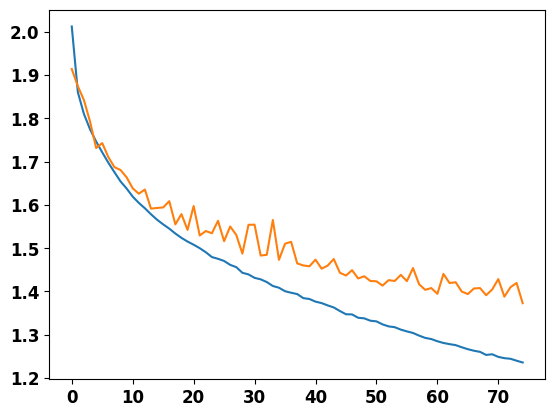

In [64]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

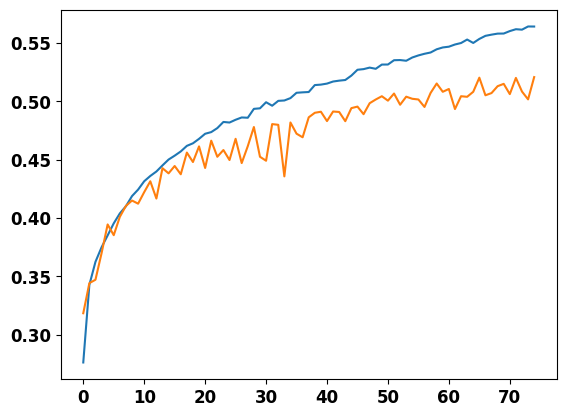

In [65]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [66]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()

313/313 [==============================] - 1s 2ms/step


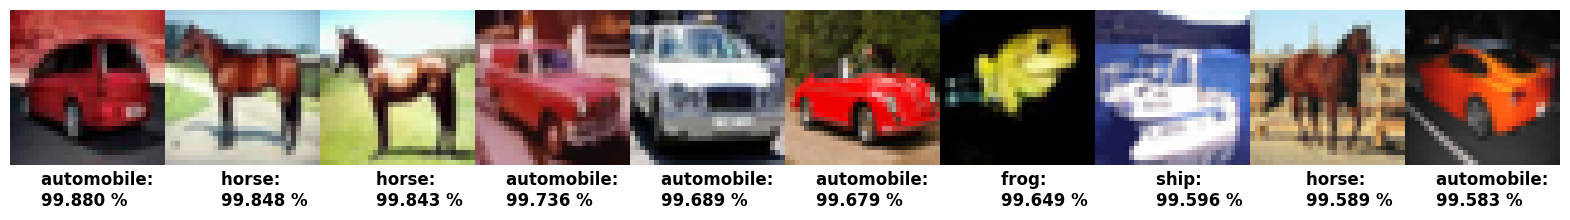

In [67]:
show_the_best_predictions(model, X_test, y_test)

In [68]:
def show_the_worst_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmin(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()

313/313 [==============================] - 1s 2ms/step


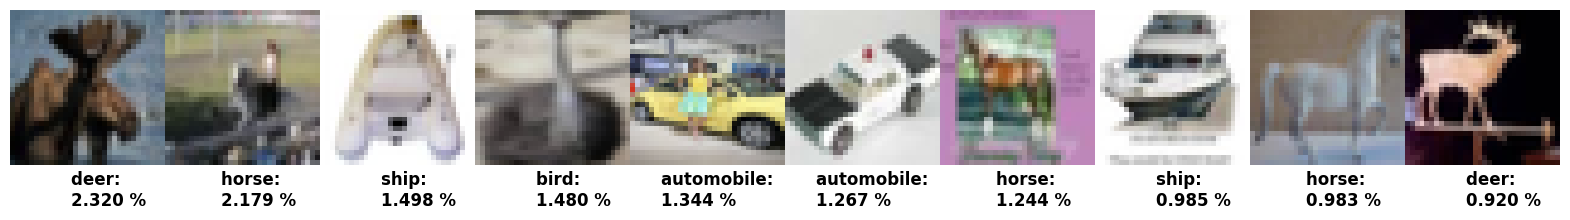

In [69]:
show_the_worst_predictions(model, X_test, y_test)

#unsuccessful tries
#changing learning rate-(best was 0.1)
#changing no of epochs somehow better(after some value it doesn't change the accuracy, under some value it doesn't cover enough iterations)
#double batch size-better
#For the hyperparameter tuning, at first I tried to add some dropout value(0.1) as a regularization method. Afterwards, I changed some of the hyperparameter values such as learning rate, epochs, and batch size. My best accuracy is 52.33%.